In [31]:
# Importiere die notwendigen Bibliotheken
import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML
import pandas as pd
from tabulate import tabulate
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Auswertung ImprovementType
df = pd.read_csv('ils_results_Improvement.csv')
sorted_df = df.sort_values(by='TotalProfit', ascending=False)
display(sorted_df)

,Instance,MainTasks,sublists_to_modify,consecutive_to_remove,threshold,neighborhoodEvaluationStrategyDelta,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit
6,7_8_1,True,2,3,3,FirstImprovement,2151,19592.0,922,258,382.5802,360
2,7_8_1,True,2,3,3,BestImprovement,2149,22969.0,920,208,382.9596,360
7,7_5_1,False,2,3,3,FirstImprovement,2039,5095.0,788,284,382.1611,360
3,7_5_1,False,2,3,3,BestImprovement,2036,4145.0,791,283,382.9027,360
5,7_5_1,True,2,3,3,FirstImprovement,1657,11169.0,634,281,375.6135,360
1,7_5_1,True,2,3,3,BestImprovement,1650,12761.0,638,229,376.0245,360
4,7_2_1,True,2,3,3,FirstImprovement,781,3674.0,278,448,363.8384,360
0,7_2_1,True,2,3,3,BestImprovement,778,4621.0,276,328,363.8802,360


In [33]:
df = pd.read_csv('ils_results.csv')

# Round 'RunTime' to the nearest integer
df['RunTime'] = df['RunTime'].round(2).astype(int)

# Convert 'WaitingTime' to integers as it only has whole numbers
df['WaitingTime'] = df['WaitingTime'].astype(int)

# Rename specific columns
df = df.rename(columns={
    'sublists_to_modify': 'Routes',
    'consecutive_to_remove': 'Consecutive Tasks',
    'threshold': 'Limit',
    # Add more columns to rename as needed
})
df.head(3)


,Instance,MainTasks,Routes,Consecutive Tasks,Limit,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit
0,7_2_1,True,2,3,3,778,4621,276,328,363,360
1,7_2_1,True,2,3,6,779,4116,277,381,363,360
2,7_2_1,True,2,3,9,775,5080,275,292,363,360


##### Calculale RPD


In [34]:
#Find the maximum 'TotalProfit' for each 'Instance'
max_profit_per_instance_task = df.groupby(['Instance', 'MainTasks'])['TotalProfit'].transform('max')
# Calculate RPD
df['RPD'] = ((max_profit_per_instance_task - df['TotalProfit']) / max_profit_per_instance_task) * 100

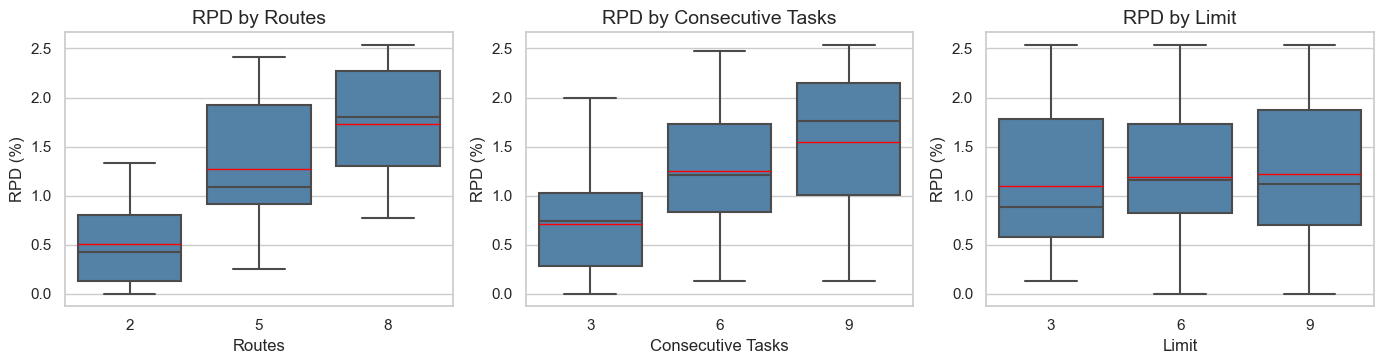

In [35]:
#Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot
parameters = ['Routes', 'Consecutive Tasks', 'Limit']

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Create subplots - one for each parameter
fig, axes = plt.subplots(1, len(parameters), figsize=(14, 4))

# Loop through the parameters and create boxplots in subplots
for i, param in enumerate(parameters):
    sns.boxplot(x=param, y='RPD', data=df, showmeans=True, meanline=True,
                meanprops={"color": "red", "ls": "-", "lw": 1},
                color=boxplot_color, ax=axes[i])  # Set consistent color
    
    # Set titles for each subplot
    axes[i].set_title(f'RPD by {param}', fontsize=14)
    axes[i].set_xlabel(param, fontsize=12)
    axes[i].set_ylabel('RPD (%)', fontsize=12)

# Adjust the layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure as a PNG file
plt.savefig('rpd_box_plots_ILS.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot (adding 'MaxRandomMoves')
parameters = ['Routes', 'Consecutive Tasks', 'Limit']

# List of instances
instances = df['Instance'].unique()

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Loop through the instances to create separate plots
for instance in instances:
    # Filter the dataframe for the current instance
    instance_df = df[df['Instance'] == instance]
    
    # Create a new figure for each instance
    fig, axes = plt.subplots(1, len(parameters), figsize=(14, 4))  # Adjust figure size for 4 columns
    
    # Add a title for the entire figure
    fig.suptitle(f'Instance: {instance}', fontsize=16, y=0.94)
    
    # Loop through the parameters to create boxplots in the current figure
    for col, param in enumerate(parameters):
        sns.boxplot(x=param, y='RPD', data=instance_df, showmeans=True, meanline=True,
                    meanprops={"color": "red", "ls": "-", "lw": 1},
                    color=boxplot_color, ax=axes[col])  # Set consistent color
        
        # Set axis labels for each subplot
        axes[col].set_xlabel(param, fontsize=12)
        
        # Only set ylabel for the first plot
        if col == 0:
            axes[col].set_ylabel('RPD (%)', fontsize=12)
        else:
            axes[col].set_ylabel('')
    
    # Adjust the layout to make space for the overall formatting
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save the figure as a PNG file with the instance name
    filename = f'rpd_box_plots_ILS_{instance}.png'
    plt.savefig(filename, dpi=300)  # Save with high dpi for quality

    # Close the plot to avoid display during the loop
    plt.close(fig)